### Extreme Heat Events in France – Create a baseline machine learning model using current temperature and wind data (Step 2)

In [27]:
# Settings and Imports

import pandas as pd
import numpy as np

In [28]:
# Read csv files

files = {
    "Paris": "temp_wind_paris.csv",
    "Lyon": "temp_wind_lyon.csv",
    "Bordeaux": "temp_wind_bordeaux.csv",
    "Marseille": "temp_wind_marseille.csv",
}

dfs = []
for city, path in files.items():
    df = pd.read_csv("data/" + path)
    df["city"] = city
    dfs.append(df)

# Concatenating files together as column city is unique
data = pd.concat(dfs, ignore_index=True)

display(data.head())
display(data.info())

,date,temp_mean_c,temp_max_c,wind_mean_10m_ms,wind_mean_2m_ms,wind_max_hourly_ms,wind_max_inst_ms,wind_gust_3s_ms,wind_dir_max_deg,wind_dir_inst_deg,city
0,1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris
1,1958-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris
2,1958-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris
3,1958-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris
4,1958-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506239 entries, 0 to 506238
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                506239 non-null  object 
 1   temp_mean_c         266408 non-null  float64
 2   temp_max_c          467883 non-null  float64
 3   wind_mean_10m_ms    250959 non-null  float64
 4   wind_mean_2m_ms     9551 non-null    float64
 5   wind_max_hourly_ms  172639 non-null  float64
 6   wind_max_inst_ms    251531 non-null  float64
 7   wind_gust_3s_ms     156908 non-null  float64
 8   wind_dir_max_deg    172367 non-null  float64
 9   wind_dir_inst_deg   229193 non-null  float64
 10  city                506239 non-null  object 
dtypes: float64(9), object(2)
memory usage: 42.5+ MB


None

In [60]:
# 

def show_avail_pct_by_city(df):
    """ Show the available data by city in percentage."""
    avail_pct_by_city = (
    df
    .groupby("city")
    .apply(lambda g: (g.notna().mean()).mul(100), include_groups=False)
    )

    return avail_pct_by_city.round(2).style.highlight_max(axis=0, color='lightcoral')

show_avail_pct_by_city(data)

# Wind data for Marseille are most complete

,temp_mean_c,temp_max_c,wind_mean_10m_ms,wind_mean_2m_ms,wind_max_hourly_ms,wind_max_inst_ms,wind_gust_3s_ms,wind_dir_max_deg,wind_dir_inst_deg
city,,,,,,,,,
Bordeaux,72.950000,99.980000,59.420000,7.070000,39.020000,54.130000,34.560000,39.010000,50.870000
Lyon,25.010000,97.650000,20.040000,0.000000,13.770000,20.010000,11.610000,13.770000,16.750000
Marseille,71.760000,96.970000,83.660000,0.000000,59.080000,87.510000,53.300000,59.040000,80.790000
Paris,37.390000,69.840000,31.280000,0.000000,21.990000,33.830000,22.870000,21.790000,29.370000


In [30]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [55]:
# Setting date as index in data.

wind = data.set_index("city", append=True).swaplevel(0,1)
wind = wind.sort_index()

display(wind.index)
display(wind.head())

MultiIndex([('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-02'),
            ('Bordeaux', '1950-01-02'),
            ('Bordeaux', '1950-01-02'),
            ('Bordeaux', '1950-01-02'),
            ('Bordeaux', '1950-01-02'),
            ...
            (   'Paris', '2023-12-28'),
            (   'Paris', '2023-12-29'),
            (   'Paris', '2023-12-29'),
            (   'Paris', '2023-12-29'),
            (   'Paris', '2023-12-30'),
            (   'Paris', '2023-12-30'),
            (   'Paris', '2023-12-30'),
            (   'Paris', '2023-12-31'),
            (   'Paris', '2023-12-31'),
            (   'Paris', '2023-12-31')],
           names=['city', 'date'], length=506239)

temp_mean_c  temp_max_c  wind_mean_10m_ms  \
city     date                                                    
Bordeaux 1950-01-01          NaN         4.0               NaN   
         1950-01-01          2.4         2.6               3.5   
         1950-01-01          NaN         9.8               NaN   
         1950-01-01          2.9         3.4               2.8   
         1950-01-01          NaN         3.6               NaN   

                     wind_mean_2m_ms  wind_max_hourly_ms  wind_max_inst_ms  \
city     date                                                                
Bordeaux 1950-01-01              NaN                 NaN               NaN   
         1950-01-01              NaN                 NaN               9.0   
         1950-01-01              NaN                 NaN               NaN   
         1950-01-01              NaN                 NaN               8.0   
         1950-01-01              NaN                 NaN               NaN   

                     wind_gust_3s_ms  wind_dir_max_deg  wind_dir_inst_deg  
city     date                                                              
Bordeaux 1950-01-01              NaN               NaN                NaN  
         1950-01-01              NaN               NaN               50.0  
         1950-01-01              NaN               NaN                NaN  
         1950-01-01              NaN               NaN                NaN  
         1950-01-01              NaN               NaN                NaN

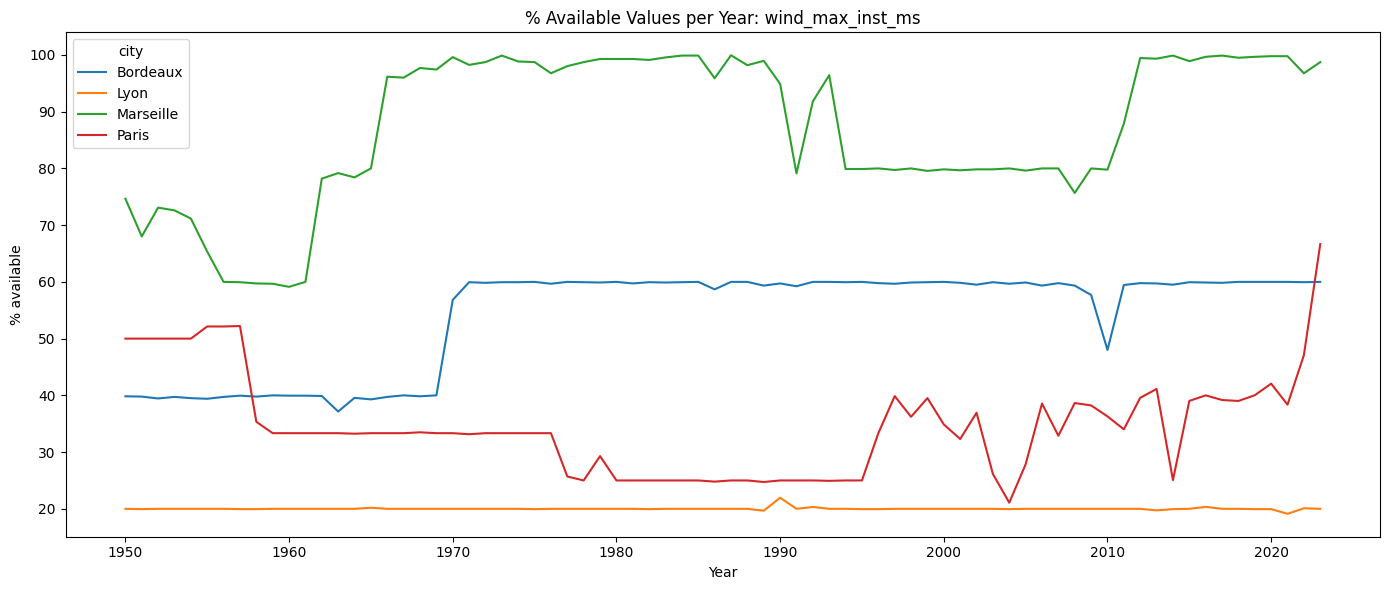

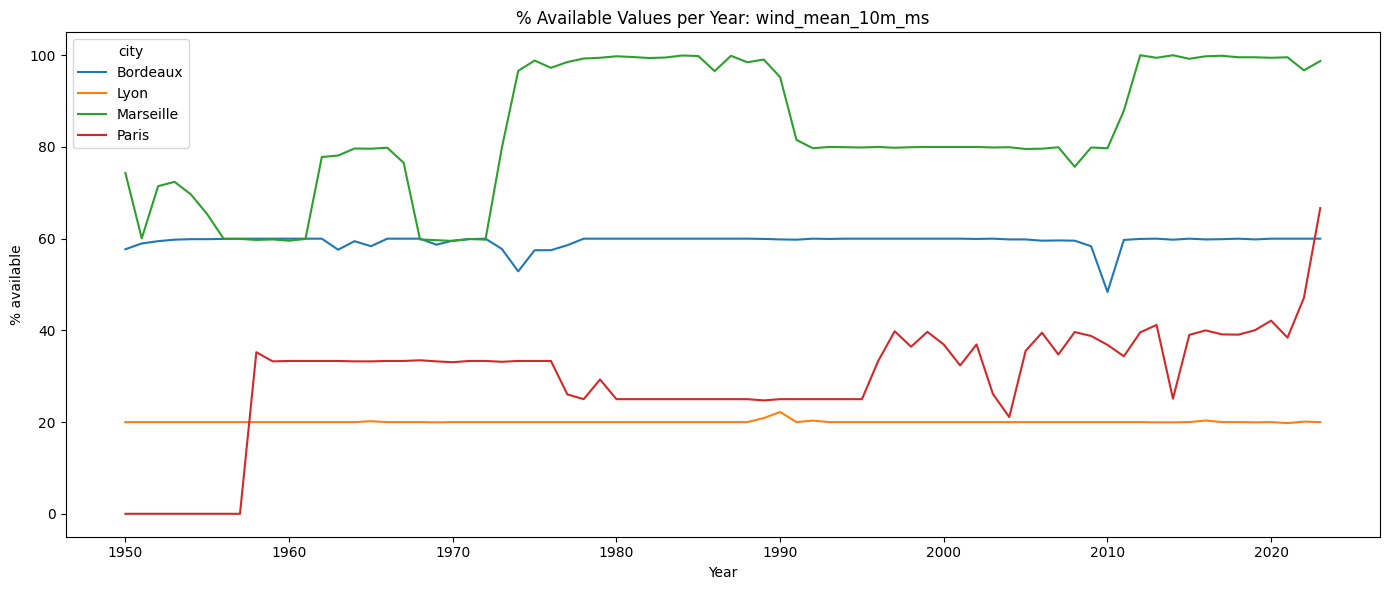

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_lp_avail_data_by_city(data, col="wind_max_inst_ms"):
    """Show line plot of available wind data by city for a variable""" 
    availability = (
        wind[col]
        .notna()                                # True = vorhanden
        .groupby(level="city")
        .resample("YS", level="date")           # jährlich
        .mean()
        .mul(100)
        .rename("availability_pct")
        .reset_index()
    )
    
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=availability, x="date", y="availability_pct", hue="city")
    plt.ylabel("% available")
    plt.xlabel("Year")
    plt.title(f"% Available Values per Year: {col}")
    plt.tight_layout()
    plt.show()

show_lp_avail_data_by_city(wind, col="wind_max_inst_ms")
show_lp_avail_data_by_city(wind, col="wind_mean_10m_ms")